# Exemplo sobre a correlação cruzada

A correlação cruzada é definida por

\begin{equation}
R_{xy}(\tau)=\int_{-\infty}^{\infty}x(t)y(t+\tau)\mathrm{d} t
\tag{1}
\end{equation}

Considerede um navio a navegar por águas não muito conhecidas. Para navegar com segurança, o navio necessita ter uma noção da profundidade da coluna de água sobre a qual navega. É difícil inspecionar a coluna d'água por inspeção visual, já que a luz não se propaga bem na água. No entanto, podemos usar as ondas sonoras para tal. 

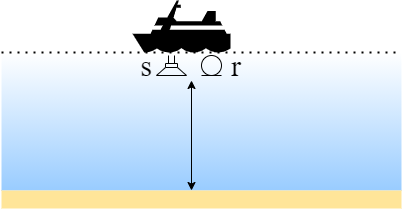

Assim, o navio é equipado com uma fonte sonora e um hidrofone. A fonte emite um sinal na água, $s(t)$, que se propaga até o fundo e é, então refletido. O hidrofone, próximo à fonte sonora, captará o som direto, $s(t)$, e a reflexão - uma versão atrasada e reduzida do sinal emitido, $r_c s(t-\Delta)$ . No entanto, ambos sinais são corrompidos por ruído, especialmente a reflexão. Assim, os sinais medidos são:

\begin{equation}
x(t)=s(t) + n_x(t)
\end{equation}

\begin{equation}
y(t)=s(t) + r_c s(t-\Delta) + n_y(t)
\end{equation}

Vamos iniciar olhando para estes sinais.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
from scipy.stats import norm
from scipy import signal
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd

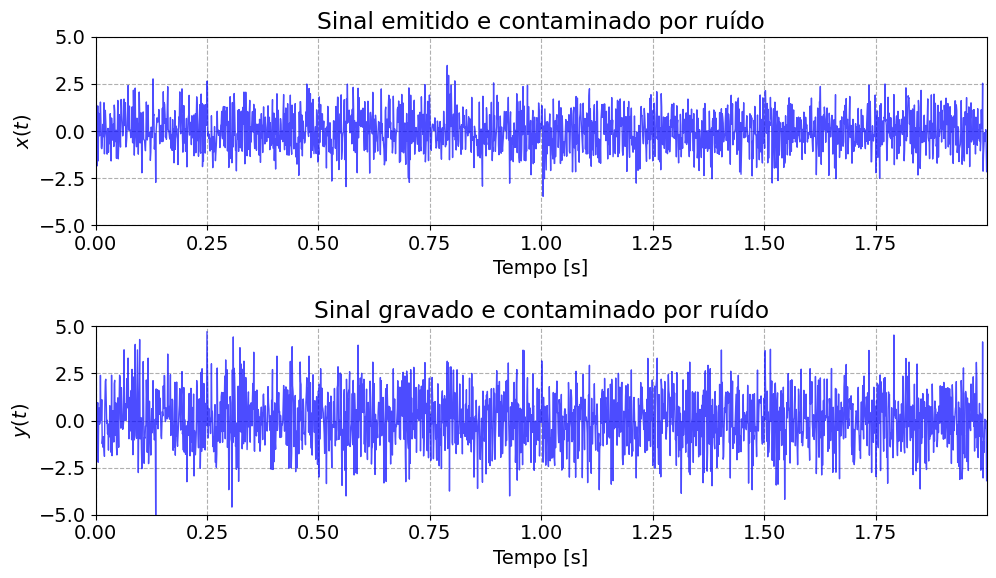

In [8]:
# Frequencia de amostragem e vetor temporal
fs = 1000
time = np.arange(0, 2, 1/fs)
Delta = 0.1
r_c = 0.2

# inicializar o gerador de números aleatórios
#np.random.seed(0)

# sinal s(t)
st = np.random.normal(loc = 0, scale = 1, size = len(time))

# Ruído de fundo
n_x = np.random.normal(loc = 0, scale = 0.1, size = len(time))
n_y = np.random.normal(loc = 0, scale = 1, size = len(time))

# Sinais x(t) e y(t)
xt = st + n_x # O sinal é totalmente contaminado por ruído

yt = np.zeros(len(time)) + st #+ n_y # Inicialize - o sinal é totalmente contaminado por ruído
yt[int(Delta*fs):] = yt[int(Delta*fs):] + r_c * st[:len(time)-int(Delta*fs)] # A partir de um certo instante temos a reflexão
yt = yt + n_y


# plot signal
plt.figure(figsize = (10, 6))
plt.subplot(2,1,1)
plt.plot(time, xt, linewidth = 1, color='b', alpha = 0.7)
plt.grid(linestyle = '--', which='both')
plt.title('Sinal emitido e contaminado por ruído')
plt.ylabel(r'$x(t)$')
plt.xlabel('Tempo [s]')
plt.xlim((0, time[-1]))
plt.ylim((-5, 5))

plt.subplot(2,1,2)
plt.plot(time, yt, linewidth = 1, color='b', alpha = 0.7)
plt.grid(linestyle = '--', which='both')
plt.title('Sinal gravado e contaminado por ruído')
plt.ylabel(r'$y(t)$')
plt.xlabel('Tempo [s]')
plt.xlim((0, time[-1]))
plt.ylim((-5, 5))
plt.tight_layout()


# Como podemos estimar a distância até o fundo?

Vamos pensar em mensurar a auto-correlação de $y(t)$ e a correlação cruzada entre $x(t)$ e $y(t)$. Tente usar o conceito de estimadores ($E[\cdot]$) para ter uma intuição a respeito. Com eles, você poderá provar que

\begin{equation}
R_{yy}(\tau)=(1+r_{c}^{2})R_{ss}(\tau) + R_{n_y n_y}(\tau) + r_c R_{ss}(\tau-\Delta) + r_c R_{ss}(\tau+\Delta)
\end{equation}

\begin{equation}
R_{xy}(\tau)=R_{ss}(\tau) + r_c R_{ss}(\tau-\Delta)
\end{equation}

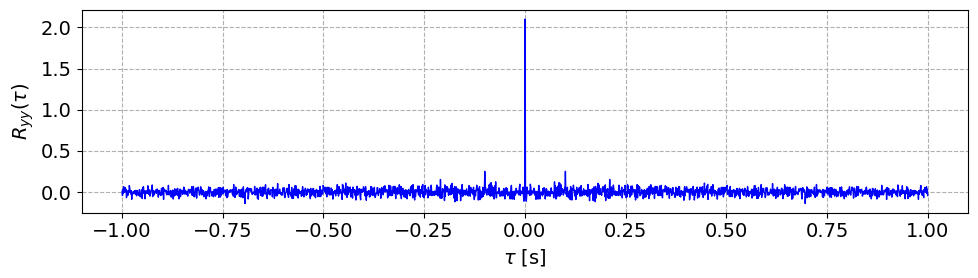

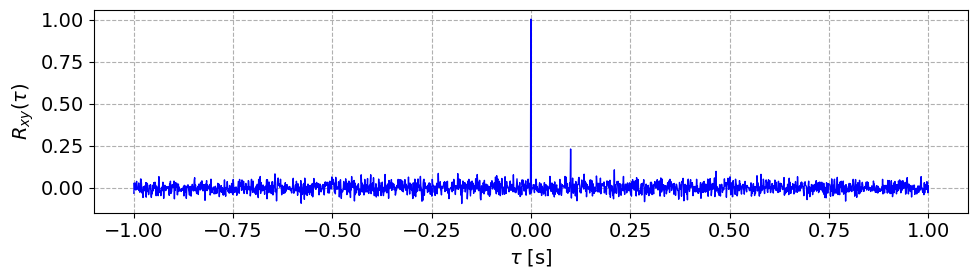

In [9]:
# Calculemos a auto-correlação
Ryy = np.correlate(yt, yt, mode = 'same')
Rxy = np.correlate(xt, yt, mode = 'same')

tau = np.linspace(-0.5*len(Rxy)/fs, 0.5*len(Rxy)/fs, len(Rxy))

#tau = np.linspace(0, len(Rxy)/fs, len(Rxy))

# plot autocorrelação
plt.figure(figsize = (10, 3))
plt.plot(tau, Ryy/len(Ryy), linewidth = 1, color='b')
plt.grid(linestyle = '--', which='both')
plt.ylabel(r'$R_{yy}(\tau)$')
#plt.xlim((tau[0], tau[-1]))
plt.xlabel(r'$\tau$ [s]')
plt.tight_layout()

# plot Correlação cruzada
plt.figure(figsize = (10, 3))
plt.plot(-tau,Rxy/len(Rxy), linewidth = 1, color='b')
plt.grid(linestyle = '--', which='both')
plt.ylabel(r'$R_{xy}(\tau)$')
#plt.xlim((tau[0], tau[-1]))
plt.xlabel(r'$\tau$ [s]')
plt.tight_layout()

# Conhecendo a velocidade do som na água...

Podemos calcular a distância. $c_{a} = 1522$ [m/s].

In [10]:
find_peak = np.where(np.logical_and(Rxy/len(Ryy) >= 0.2, Rxy/len(Ryy) <= 0.5))
lag = -tau[find_peak[0][0]]
distance = 1522*lag/2

print('O atraso detectado é: {:.5f} [s]'.format(lag))
print('A distância para o fundo é: {:.2f} [m]'.format(distance))

O atraso detectado é: 0.09955 [s]
A distância para o fundo é: 75.76 [m]
